In [3]:
import pandas as pd
#Load the data
file_path = r'C:\Users\BKand\Twitter API Project\training.1600000.processed.noemoticon.csv'
df = pd.read_csv(file_path, encoding='latin1', header=None)
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
print("Loaded Data:")
print(df.head())


Loaded Data:
   target         ids                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


In [4]:
# Clean the collected data
import re
def clean_tweet(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\S+', '', text)  # Remove mentions
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)  # Remove special characters
    return text

df['Cleaned_Text'] = df['text'].apply(clean_tweet)
print("Cleaned Data:")
print(df[['text', 'Cleaned_Text']].head())

Cleaned Data:
                                                text  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1  is upset that he can't update his Facebook by ...   
2  @Kenichan I dived many times for the ball. Man...   
3    my whole body feels itchy and like its on fire    
4  @nationwideclass no, it's not behaving at all....   

                                        Cleaned_Text  
0     Awww thats a bummer  You shoulda got David ...  
1  is upset that he cant update his Facebook by t...  
2   I dived many times for the ball Managed to sa...  
3    my whole body feels itchy and like its on fire   
4   no its not behaving at all im mad why am i he...  


In [6]:
# Perform sentiment analysis

from textblob import TextBlob

# Perform sentiment analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['Sentiment'] = df['Cleaned_Text'].apply(get_sentiment)

# Verify the Sentiment column
print(df[['Cleaned_Text', 'Sentiment']].head())
print(df.columns)

                                        Cleaned_Text Sentiment
0     Awww thats a bummer  You shoulda got David ...  Positive
1  is upset that he cant update his Facebook by t...   Neutral
2   I dived many times for the ball Managed to sa...  Positive
3    my whole body feels itchy and like its on fire   Positive
4   no its not behaving at all im mad why am i he...  Negative
Index(['target', 'ids', 'date', 'flag', 'user', 'text', 'Cleaned_Text',
       'Sentiment'],
      dtype='object')


Sentiment Counts:
Sentiment
Positive    686674
Neutral     569833
Negative    343493
Name: count, dtype: int64


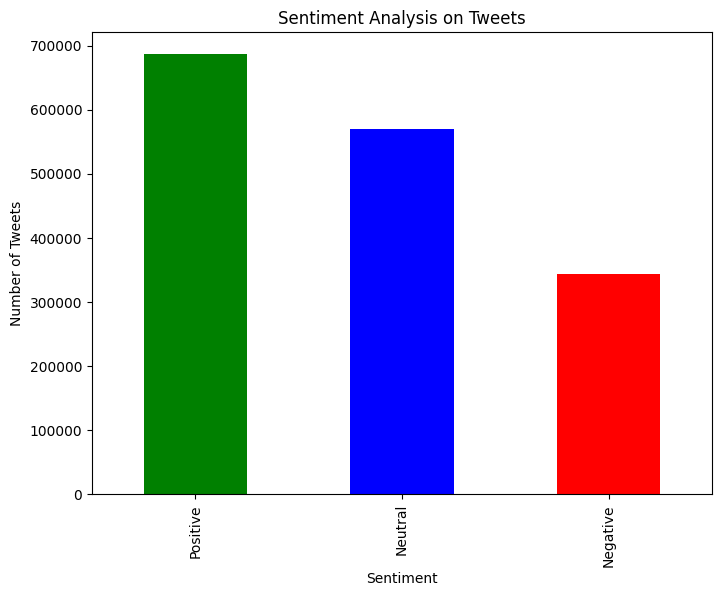

In [81]:
# Visualize the results
sentiment_counts = df['Sentiment'].value_counts()
print("Sentiment Counts:")
print(sentiment_counts)

# Adjust color list based on the number of unique sentiments
unique_sentiments = sentiment_counts.index
colors = ['green', 'blue', 'red'][:len(unique_sentiments)]

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=colors)
plt.title('Sentiment Analysis on Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [8]:
total_tweets = len(df)
positive_tweets = len(df[df['Sentiment'] == 'Positive'])
neutral_tweets = len(df[df['Sentiment'] == 'Neutral'])
negative_tweets = len(df[df['Sentiment'] == 'Negative'])

print(f"Total tweets: {total_tweets}")
print(f"Positive tweets: {positive_tweets} ({positive_tweets/total_tweets*50:.2f}%)")
print(f"Neutral tweets: {neutral_tweets} ({neutral_tweets/total_tweets*50:.2f}%)")
print(f"Negative tweets: {negative_tweets} ({negative_tweets/total_tweets*50:.2f}%)")


Total tweets: 1600000
Positive tweets: 686674 (21.46%)
Neutral tweets: 569833 (17.81%)
Negative tweets: 343493 (10.73%)


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df['Sentiment_Label'] = df['Sentiment'].map({'Positive': 1, 'Neutral': 0, 'Negative': -1})

In [11]:
X = df['Cleaned_Text']
y = df['Sentiment_Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 1280000
Testing set size: 320000


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

# Create a pipeline with a CountVectorizer and a Logistic Regression classifier
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', LogisticRegression(solver='liblinear'))  # Use a different solver
])

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
accuracy = pipeline.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 96.88%
